#PyTorch Workflow

Let's explore a an examplr by Pytorch end-to-end encryption

In [12]:
import torch
from torch import nn #nn contains all of pytorch building blocks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

#Data

Data can be almost anything ... in machine learning

#Linear regression (y = mx + b)

In [13]:
#Create *known* parameters

weight = 0.7
bias = 0.3

#Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
Y= weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets

One of the most important cconcepts in machine learning in general

In [14]:
#Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

###Vizualizing our data

In [15]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s = 4, label= "Training data")
  plt.scatter(test_data, test_labels, c="g", s = 4, label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s=4, label="Prediction data")

  plt.legend(prop={"size" : 14});

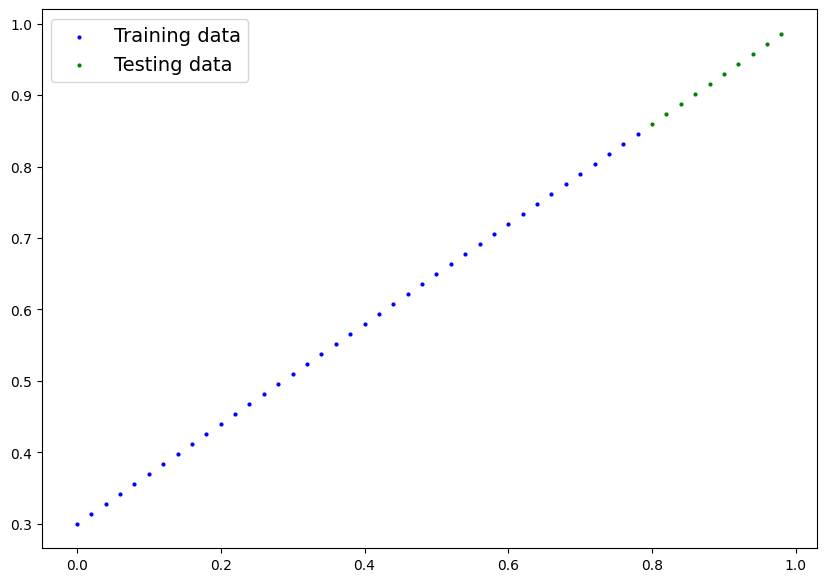

In [16]:
plot_predictions();

## Build a model
First PyTorch model

In [42]:
from torch import nn
class LinearRegressionModel(nn.Module): # <- Almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad= True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad= True,
                                         dtype = torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

### PyTorch Module Building essentials
* torch.nn: Building blocks
* torch.nn.paramters(): what parameter should our model try and Learn
* module
* torch.optim : This where the optimizers in PyTorch live
* def forward: this method defines what happens in forward computation

### Checking the contents of our PyTorch Model
check parameters - `.parameters()`

In [43]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of model
model_0 = LinearRegressionModel()

#Check out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [44]:
#List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [45]:
weight, bias

(0.7, 0.3)

In [46]:
with torch.inference_mode():
  y_preds = model_0(X_test)

#Can also do something similar with torch.no_grad()

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

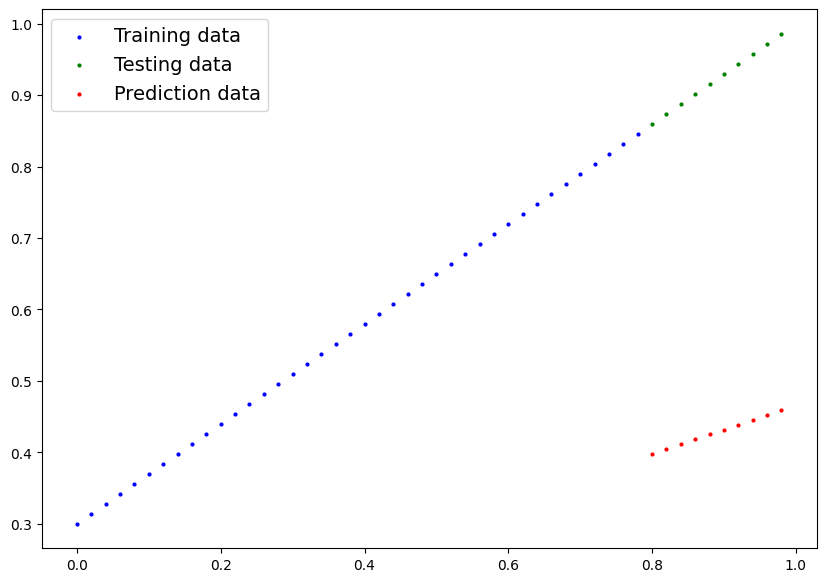

In [47]:
plot_predictions(predictions=y_preds)

### The whole idea of training is to move from some random parameters to required paramters

loss function


optimizer


In [48]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [52]:
#Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01) #lr = learning rate

#Building a training and testing loop:


In [76]:
torch.manual_seed(42)
epochs = 300
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train()
  #1.
  y_preds = model_0(X_train)
  #2.
  loss = loss_fn(y_preds, y_train)
  print(f"Loss: {loss}")
  #3.
  optimizer.zero_grad()
  #4.
  loss.backward()
  #5.
  optimizer.step()
  #Testing
  model_0.eval()
  print(model_0.state_dict())

Loss: 0.0025885067880153656
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 0.008932482451200485
OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])
Loss: 0.0025885067880153656
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 0.008932482451200485
OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])
Loss: 0.0025885067880153656
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 0.008932482451200485
OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])
Loss: 0.0025885067880153656
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 0.008932482451200485
OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])
Loss: 0.0025885067880153656
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loss: 0.008932482451200485
OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])
Loss:

In [77]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

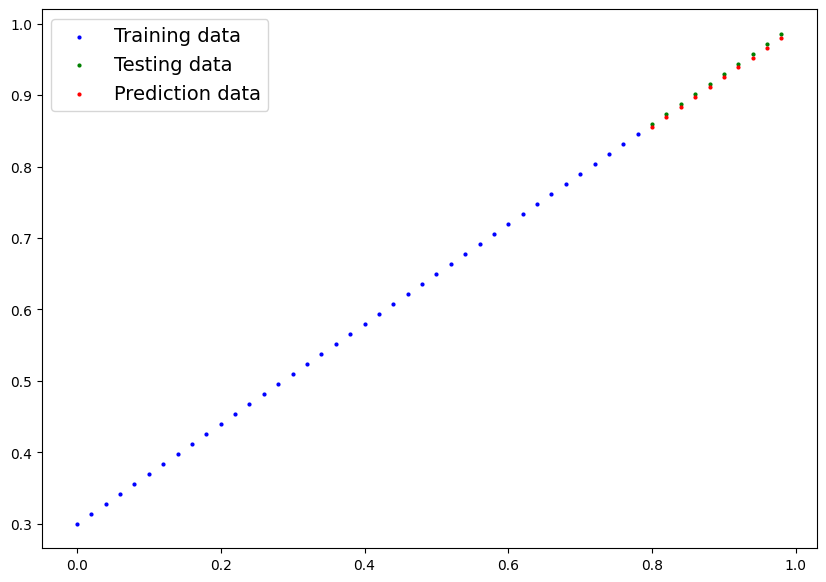

In [78]:
plot_predictions(predictions=y_preds_new)